<a href="https://colab.research.google.com/github/Dimon-art/Dimon-Art/blob/main/1223_%D0%94%D0%97_Lite_%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Из ноутбуков по практике "Рекуррентные и одномерные сверточные нейронные сети" выберите лучшую сеть, либо создайте свою.
2. Запустите раздел "Подготовка"
3. Подготовьте датасет с параметрами `VOCAB_SIZE=20'000`, `WIN_SIZE=1000`, `WIN_HOP=100`, как в ноутбуке занятия, и обучите выбранную сеть. Гиперпараметры обучения можно взять из практического занятия. Для  всех обучаемых сетей в данной работе они должны быть одни и теже.
4. Поменяйте размер словаря tokenaizera (`VOCAB_SIZE`) на `5000`, `10000`, `40000`.  Пересоздайте датасеты, при этом оставьте `WIN_SIZE=1000`, `WIN_HOP=100`.
Обучите выбранную нейронку на этих датасетах.
5. Поменяйте длину отрезка текста и шаг окна разбиения текста на векторы  (`WIN_SIZE`, `WIN_HOP`) используя значения (`500`,`50`) и (`2000`,`200`). Пересоздайте датасеты, при этом оставьте `VOCAB_SIZE=20000`. Обучите выбранную нейронку на этих датасетах.
6. В конце ноутбука выведите cреднюю точность распознавания для каждой сети.

## Подготовка

In [1]:
# Работа с массивами данных
import numpy as np

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [2]:
# Загрузим датасет из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)

'writers.zip'

In [22]:
writers = ['Булгаков', 'Клиффорд_Саймак','Макс Фрай','О.Генри','Рей_Бредберри','Стругацкие'] # replace with the actual list of writers

In [3]:
# Распакуем архив в папку writers
!unzip -o writers.zip -d writers/


Archive:  writers.zip
  inflating: writers/(Клиффорд_Саймак) Обучающая_5 вместе.txt  
  inflating: writers/(Клиффорд_Саймак) Тестовая_2 вместе.txt  
  inflating: writers/(Макс Фрай) Обучающая_5 вместе.txt  
  inflating: writers/(Макс Фрай) Тестовая_2 вместе.txt  
  inflating: writers/(О. Генри) Обучающая_50 вместе.txt  
  inflating: writers/(О. Генри) Тестовая_20 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Обучающая_22 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Тестовая_8 вместе.txt  
  inflating: writers/(Стругацкие) Обучающая_5 вместе.txt  
  inflating: writers/(Стругацкие) Тестовая_2 вместе.txt  
  inflating: writers/(Булгаков) Обучающая_5 вместе.txt  
  inflating: writers/(Булгаков) Тестовая_2 вместе.txt  


In [4]:
# Настройка констант для загрузки данных
FILE_DIR  = 'writers'                     # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

In [24]:
lst = []
for i in os.listdir('writers'):
  lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = list(set(lst))
ClassCount = len(writers)

print(writers)
print(ClassCount)

['Клиффорд_Саймак', 'Рэй Брэдберри', 'Булгаков', 'Макс Фрай', 'О. Генри', 'Стругацкие']
6


In [20]:
for name in os.listdir('writers'):
  print(name)

(О. Генри) Обучающая_50 вместе.txt
(Клиффорд_Саймак) Обучающая_5 вместе.txt
(Рэй Брэдберри) Тестовая_8 вместе.txt
(Макс Фрай) Тестовая_2 вместе.txt
(Рэй Брэдберри) Обучающая_22 вместе.txt
(Макс Фрай) Обучающая_5 вместе.txt
(Клиффорд_Саймак) Тестовая_2 вместе.txt
(Булгаков) Тестовая_2 вместе.txt
(О. Генри) Тестовая_20 вместе.txt
(Стругацкие) Тестовая_2 вместе.txt
(Булгаков) Обучающая_5 вместе.txt
(Стругацкие) Обучающая_5 вместе.txt


In [5]:
# Подготовим пустые списки

CLASS_LIST = []  # Список классов
text_train = []  # Список для оучающей выборки
text_test = []   # Список для тестовой выборки

# Получим списка файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    # Выделяем имя класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    # Если выделение получилось, то файл обрабатываем
    if m:

        # Получим имя класса
        class_name = m[1]

        # Получим имя выборки
        subset_name = m[2].lower()

        # Проверим тип выборки
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатываем
        if is_train or is_test:

            # Добавляем новый класс, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)

                # Инициализируем соответствующих классу строки текста
                text_train.append('')
                text_test.append('')

            # Найдем индекс класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')

            # Откроем файл на чтение
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:

                # Загрузим содержимого файла в строку
                text = f.read()
            # Определим выборку, куда будет добавлено содержимое
            subset = text_train if is_train else text_test

            # Добавим текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

Добавление класса "О. Генри"
Добавление файла "(О. Генри) Обучающая_50 вместе.txt" в класс "О. Генри", обучающая выборка.
Добавление класса "Клиффорд_Саймак"
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление класса "Рэй Брэдберри"
Добавление файла "(Рэй Брэдберри) Тестовая_8 вместе.txt" в класс "Рэй Брэдберри", тестовая выборка.
Добавление класса "Макс Фрай"
Добавление файла "(Макс Фрай) Тестовая_2 вместе.txt" в класс "Макс Фрай", тестовая выборка.
Добавление файла "(Рэй Брэдберри) Обучающая_22 вместе.txt" в класс "Рэй Брэдберри", обучающая выборка.
Добавление файла "(Макс Фрай) Обучающая_5 вместе.txt" в класс "Макс Фрай", обучающая выборка.
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление класса "Булгаков"
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление файла "(О. Генри) Тестовая_20 вместе.txt" в класс

In [6]:
# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

In [7]:
# Выведем прочитанные классы текстов
print(CLASS_LIST)

['О. Генри', 'Клиффорд_Саймак', 'Рэй Брэдберри', 'Макс Фрай', 'Булгаков', 'Стругацкие']


In [8]:
# Посчитаем количество текстов в обучающей выборке
print(len(text_train))

6


In [9]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):                   # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')           # Выведем имя класса
    print(f'  train: {text_train[cls][:200]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls][:200]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: О. Генри
  train:  «Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гареме. Город лежал у самого моря на полоске наносной земли. Он казался брильянтиком, вкрапленным в ярко
  test :  ﻿Багдадская птица   Без всякого сомнения, дух и гений калифа Гаруна аль-Рашида осенил маркграфа Августа-Михаила фон Паульсена Квигга.  Ресторан Квигга находится на Четвертой авеню — на улице, которую

Класс: Клиффорд_Саймак
  train:  ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и
  test :  ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люб

Класс: Рэй Брэдберри
  train:  ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛАГОДАРНОСТЬЮ   Если тебе дадут линованную бумагу

In [10]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [11]:
# Задание параметров преобразования
VOCAB_SIZE = 20000                        # Объем словаря для токенизатора
WIN_SIZE   = 1000                         # Длина отрезка текста (окна) в словах
WIN_HOP    = 100                          # Шаг окна разбиения текста на векторы

In [13]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 3.60 с


In [14]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

[('неизвестное_слово', 1), ('и', 2), ('в', 3), ('не', 4), ('я', 5), ('что', 6), ('на', 7), ('с', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('это', 13), ('но', 14), ('все', 15), ('у', 16), ('по', 17), ('его', 18), ('к', 19), ('так', 20), ('мне', 21), ('из', 22), ('за', 23), ('меня', 24), ('ты', 25), ('же', 26), ('бы', 27), ('сказал', 28), ('вы', 29), ('было', 30), ('от', 31), ('они', 32), ('мы', 33), ('только', 34), ('да', 35), ('еще', 36), ('она', 37), ('о', 38), ('вот', 39), ('когда', 40), ('если', 41), ('уже', 42), ('был', 43), ('нет', 44), ('ни', 45), ('их', 46), ('ну', 47), ('чтобы', 48), ('до', 49), ('для', 50), ('ему', 51), ('ничего', 52), ('может', 53), ('или', 54), ('даже', 55), ('там', 56), ('очень', 57), ('кто', 58), ('ее', 59), ('тут', 60), ('потом', 61), ('просто', 62), ('чем', 63), ('него', 64), ('быть', 65), ('теперь', 66), ('под', 67), ('где', 68), ('нас', 69), ('есть', 70), ('тебя', 71), ('ли', 72), ('время', 73), ('тебе', 74), ('вас', 75), ('со', 76), ('нибудь

In [15]:
# Преобразование обучающих и проверочных текстов текст в последовательности индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

Фрагмент обучающего текста:
В виде оригинального текста:                ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. 
Он же в виде последовательности индексов:  [142, 2916, 40, 5, 11609, 22, 513, 1, 2, 1809, 7, 943, 952, 595, 2196, 11586, 4684, 1, 8, 1]
Время обработки: 3.30 с


In [16]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    ClassCount = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(ClassCount):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, ClassCount)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [17]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)
Время обработки: 1.88 с


In [18]:
# Вывод отрезка индексов тренировочной выборки
print(x_train[0])

[ 4725     7  2449  1757     1     3     1     1    11     1  7581     3
  3274     1     1   272  1057    16   259  2150     7     1     1   644
     9  2552     1     1     3  1652  7931  9662   952    11    27    55
     1   133   130     1   122  1409  3211     1   907     1  1158 15510
     1    36   193     1    63     1  2609  4726     1   953     1  1891
     1  2927     3     1 10220     2     1 17013     1   221     1     1
    11 15511     1   145   721     1     1     1   593   272     1     2
     1  1934     1  6737    17     1     1   371 14307    78    15  1460
     1  7932 10855  1200     7     1     1     1     1  7932     1  8682
  7582    50    64     1 14308  2656   246   272  4242    80  2414 11508
     4   743  3362     3  1757  4243  4727     8  8288     1     1  1310
  6255  2121     1   917   281     1  7010   336  7011   221 12294    17
     1   144 11508   886     8  6738  9134  5561  4861    31  4591     1
     2     1  1217     1 13217  3824     7  7267   

In [25]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Вывод схемы модели
    display(plot_model(model, dpi=60, show_shapes=True))

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels = writers,
                             title='',
                             optimizer ='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=class_labels,
               title=title,
               figsize=cm_size)

In [27]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Build the model before plotting
    model.build(input_shape=(None, x_train.shape[1]))

    # Вывод схемы модели
    display(plot_model(model, dpi=60, show_shapes=True))

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

## Решение

In [ ]:
# ваше решение

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

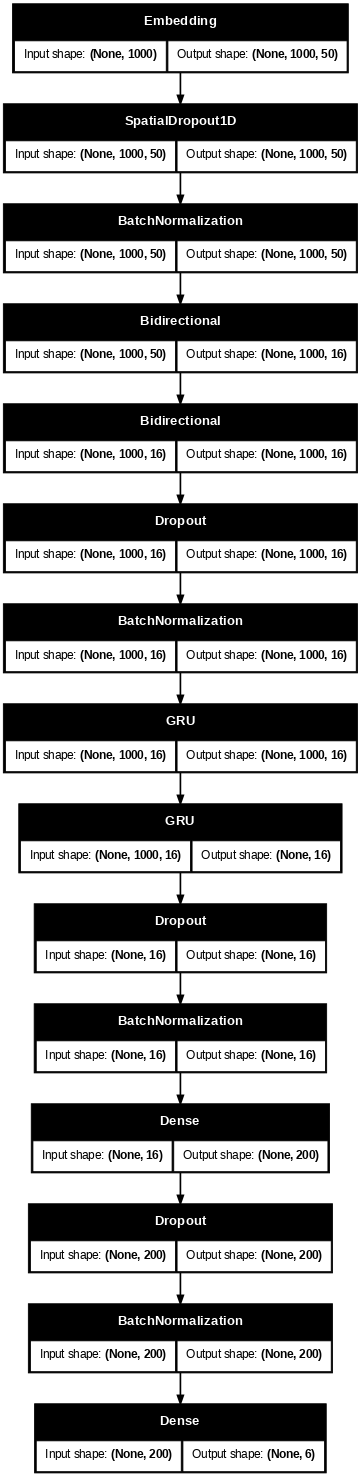

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 272s 7s/step - accuracy: 0.2068 - loss: 2.1532 - val_accuracy: 0.2929 - val_loss: 1.7377
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 254s 7s/step - accuracy: 0.2785 - loss: 1.8803 - val_accuracy: 0.2929 - val_loss: 1.7433
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 251s 7s/step - accuracy: 0.3706 - loss: 1.6396 - val_accuracy: 0.2933 - val_loss: 1.7583
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 252s 7s/step - accuracy: 0.4812 - loss: 1.3467 - val_accuracy: 0.1611 - val_loss: 1.8916
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 284s 8s/step - accuracy: 0.5544 - loss: 1.1311 - val_accuracy: 0.1805 - val_loss: 1.9973
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.6368 - loss: 0.9447 - val_accuracy: 0.3630 - val_loss: 2.1567
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.6993 - loss: 0.7798 - val_accuracy: 0.3596 - val_loss: 2.8511
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 268s 7s/step - accuracy: 0.7581 - loss: 0.6324 - val_accuracy: 0.

In [ ]:
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=WIN_SIZE))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
# Два двунаправленных рекуррентных слоя LSTM
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Два рекуррентных слоя GRU
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Дополнительный полносвязный слой
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(ClassCount, activation='softmax'))

compile_train_eval_model(model_LSTM_6,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=512,
                         class_labels=writers,
                         title='Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)')

In [ ]:
# Задание параметров преобразования
VOCAB_SIZE = 5000                       # Объем словаря для токенизатора
WIN_SIZE   = 1000                        # Длина отрезка текста (окна) в словах
WIN_HOP    = 100                          # Шаг окна разбиения текста на векторы

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items))

In [ ]:
# Преобразование обучающих и проверочных текстов текст в последовательности индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    ClassCount = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(ClassCount):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, ClassCount)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

In [ ]:
import os
import re
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Embedding, SpatialDropout1D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import time

# 1. Распаковать архив с данными
with zipfile.ZipFile('writers.zip', 'r') as zip_ref:
    zip_ref.extractall('writers')

# 2. Настроить константы для загрузки данных
FILE_DIR = 'writers'
SIG_TRAIN = 'обучающая'
SIG_TEST = 'тестовая'

# 3. Загрузить и подготовить данные
lst = []
for i in os.listdir(FILE_DIR):
    lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = list(set(lst))
ClassCount = len(writers)

# Подготовим пустые списки
CLASS_LIST = []
text_train = []
text_test = []

# Получим список файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name
        if is_train or is_test:
            if class_name not in CLASS_LIST:
                CLASS_LIST.append(class_name)
                text_train.append('')
                text_test.append('')
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r', encoding='utf-8') as f:
                text = f.read()
            subset = text_train if is_train else text_test
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

# 4. Токенизировать тексты и построить частотный словарь
VOCAB_SIZE = 10000  # Изначальный размер словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(text_train)

# 5. Преобразовать тексты в последовательности индексов
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# 6. Разбить последовательности на отрезки с помощью скользящего окна
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

# 7. Векторизовать отрезки и метки классов
def vectorize_sequence(seq_list, win_size, hop):
    x, y = [], []
    for cls in range(ClassCount):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [to_categorical(cls, ClassCount)] * len(vectors)
    return np.array(x), np.array(y)

# Fормирование обучающей и тестовой выборок
WIN_SIZE = 1000
WIN_HOP = 100
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Паддинг последовательностей до одинаковой длины
max_length = x_train.shape[1]
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# 8. Создать и обучить модель нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.build(input_shape=(None, x_train.shape[1]))
    plot_model(model, dpi=60, show_shapes=True)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()
    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Определение модели
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=max_length))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(ClassCount, activation='softmax'))

# Обучение модели
compile_train_model(model_LSTM_6, x_train, y_train, x_test, y_test, epochs=100, batch_size=512)

# 9. Оценить модель на тестовых данных
y_pred = model_LSTM_6.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Точность модели на тестовой выборке: {accuracy * 100:.2f}%')

In [ ]:
import os
import re
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Embedding, SpatialDropout1D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import time

# 1. Распаковать архив с данными
with zipfile.ZipFile('writers.zip', 'r') as zip_ref:
    zip_ref.extractall('writers')

# 2. Настроить константы для загрузки данных
FILE_DIR = 'writers'
SIG_TRAIN = 'обучающая'
SIG_TEST = 'тестовая'

# 3. Загрузить и подготовить данные
lst = []
for i in os.listdir(FILE_DIR):
    lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = list(set(lst))
ClassCount = len(writers)

# Подготовим пустые списки
CLASS_LIST = []
text_train = []
text_test = []

# Получим список файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name
        if is_train or is_test:
            if class_name not in CLASS_LIST:
                CLASS_LIST.append(class_name)
                text_train.append('')
                text_test.append('')
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r', encoding='utf-8') as f:
                text = f.read()
            subset = text_train if is_train else text_test
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

# 4. Токенизировать тексты и построить частотный словарь
VOCAB_SIZE = 40000  # Изначальный размер словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(text_train)

# 5. Преобразовать тексты в последовательности индексов
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# 6. Разбить последовательности на отрезки с помощью скользящего окна
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

# 7. Векторизовать отрезки и метки классов
def vectorize_sequence(seq_list, win_size, hop):
    x, y = [], []
    for cls in range(ClassCount):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [to_categorical(cls, ClassCount)] * len(vectors)
    return np.array(x), np.array(y)

# Fормирование обучающей и тестовой выборок
WIN_SIZE = 1000
WIN_HOP = 100
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Паддинг последовательностей до одинаковой длины
max_length = x_train.shape[1]
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# 8. Создать и обучить модель нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.build(input_shape=(None, x_train.shape[1]))
    plot_model(model, dpi=60, show_shapes=True)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()
    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Определение модели
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=max_length))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(ClassCount, activation='softmax'))

# Обучение модели
compile_train_model(model_LSTM_6, x_train, y_train, x_test, y_test, epochs=100, batch_size=512)

# 9. Оценить модель на тестовых данных
y_pred = model_LSTM_6.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Точность модели на тестовой выборке: {accuracy * 100:.2f}%')


In [ ]:
import os
import re
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Embedding, SpatialDropout1D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import time

# 1. Распаковать архив с данными
with zipfile.ZipFile('writers.zip', 'r') as zip_ref:
    zip_ref.extractall('writers')

# 2. Настроить константы для загрузки данных
FILE_DIR = 'writers'
SIG_TRAIN = 'обучающая'
SIG_TEST = 'тестовая'

# 3. Загрузить и подготовить данные
lst = []
for i in os.listdir(FILE_DIR):
    lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = list(set(lst))
ClassCount = len(writers)

# Подготовим пустые списки
CLASS_LIST = []
text_train = []
text_test = []

# Получим список файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name
        if is_train or is_test:
            if class_name not in CLASS_LIST:
                CLASS_LIST.append(class_name)
                text_train.append('')
                text_test.append('')
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r', encoding='utf-8') as f:
                text = f.read()
            subset = text_train if is_train else text_test
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

# 4. Токенизировать тексты и построить частотный словарь
VOCAB_SIZE = 20000  # Изначальный размер словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(text_train)

# 5. Преобразовать тексты в последовательности индексов
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# 6. Разбить последовательности на отрезки с помощью скользящего окна
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

# 7. Векторизовать отрезки и метки классов
def vectorize_sequence(seq_list, win_size, hop):
    x, y = [], []
    for cls in range(ClassCount):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [to_categorical(cls, ClassCount)] * len(vectors)
    return np.array(x), np.array(y)

# Fормирование обучающей и тестовой выборок
WIN_SIZE = 500
WIN_HOP = 50
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Паддинг последовательностей до одинаковой длины
max_length = x_train.shape[1]
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# 8. Создать и обучить модель нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.build(input_shape=(None, x_train.shape[1]))
    plot_model(model, dpi=60, show_shapes=True)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()
    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Определение модели
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=max_length))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(ClassCount, activation='softmax'))

# Обучение модели
compile_train_model(model_LSTM_6, x_train, y_train, x_test, y_test, epochs=100, batch_size=512)

# 9. Оценить модель на тестовых данных
y_pred = model_LSTM_6.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Точность модели на тестовой выборке: {accuracy * 100:.2f}%')



In [ ]:
import os
import re
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Dense, Embedding, SpatialDropout1D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import time

# 1. Распаковать архив с данными
with zipfile.ZipFile('writers.zip', 'r') as zip_ref:
    zip_ref.extractall('writers')

# 2. Настроить константы для загрузки данных
FILE_DIR = 'writers'
SIG_TRAIN = 'обучающая'
SIG_TEST = 'тестовая'

# 3. Загрузить и подготовить данные
lst = []
for i in os.listdir(FILE_DIR):
    lst.append(re.findall(r'((?<=[(])[А-я].+(?=[)]))', i)[0])

writers = list(set(lst))
ClassCount = len(writers)

# Подготовим пустые списки
CLASS_LIST = []
text_train = []
text_test = []

# Получим список файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:
        class_name = m[1]
        subset_name = m[2].lower()
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name
        if is_train or is_test:
            if class_name not in CLASS_LIST:
                CLASS_LIST.append(class_name)
                text_train.append('')
                text_test.append('')
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')
            with open(f'{FILE_DIR}/{file_name}', 'r', encoding='utf-8') as f:
                text = f.read()
            subset = text_train if is_train else text_test
            subset[cls] += ' ' + text.replace('\n', ' ')

# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

# 4. Токенизировать тексты и построить частотный словарь
VOCAB_SIZE = 20000  # Изначальный размер словаря
tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer.fit_on_texts(text_train)

# 5. Преобразовать тексты в последовательности индексов
seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

# 6. Разбить последовательности на отрезки с помощью скользящего окна
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

# 7. Векторизовать отрезки и метки классов
def vectorize_sequence(seq_list, win_size, hop):
    x, y = [], []
    for cls in range(ClassCount):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [to_categorical(cls, ClassCount)] * len(vectors)
    return np.array(x), np.array(y)

# Fормирование обучающей и тестовой выборок
WIN_SIZE = 2000
WIN_HOP = 200
x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP)
x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

# Паддинг последовательностей до одинаковой длины
max_length = x_train.shape[1]
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# 8. Создать и обучить модель нейронной сети
def compile_train_model(model, x_train, y_train, x_val, y_val, epochs=50, batch_size=128, figsize=(20, 5)):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    model.build(input_shape=(None, x_train.shape[1]))
    plot_model(model, dpi=60, show_shapes=True)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()
    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

# Определение модели
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=max_length))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(ClassCount, activation='softmax'))

# Обучение модели
compile_train_model(model_LSTM_6, x_train, y_train, x_test, y_test, epochs=100, batch_size=512)

# 9. Оценить модель на тестовых данных
y_pred = model_LSTM_6.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f'Точность модели на тестовой выборке: {accuracy * 100:.2f}%')


In [ ]:
# Предположим, что у вас есть список точностей для разных моделей
accuracies = [accuracy_1, accuracy_2, accuracy_3, ...]

# Вычисляем среднюю точность
average_accuracy = np.mean(accuracies)
print(f'Средняя точность распознавания: {average_accuracy * 100:.2f}%')
